# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if ( city not in cities ):
        cities.append(city)
    


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

In [53]:
London = 'london'
response=requests.get(f'https://api.openweathermap.org/data/2.5/weather?q={London}&appid={weather_api_key}').json()
response


{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 279.01,
  'feels_like': 278.03,
  'temp_min': 275.07,
  'temp_max': 281.48,
  'pressure': 1028,
  'humidity': 94},
 'visibility': 7000,
 'wind': {'speed': 1.54, 'deg': 300},
 'clouds': {'all': 75},
 'dt': 1669850413,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1669794144,
  'sunset': 1669823773},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [63]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE
        city_lng = city_weather['coord']['lon']# YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']# YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all'] # YOUR CODE HERE
        city_wind =city_weather['wind']['speed'] # YOUR CODE HERE
        city_country = city_weather['sys']['country']# YOUR CODE HERE
        city_date = city_weather['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bisho
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | eruwa
Processing Record 4 of Set 1 | copiapo
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | channel-port aux basques
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | san quintin
Processing Record 10 of Set 1 | sao jose da coroa grande
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | canton
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | phun phin
City not found. Skipping...
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | washington
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | caravelas


Processing Record 39 of Set 4 | port hedland
Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | busembatia
Processing Record 42 of Set 4 | waynesville
Processing Record 43 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 44 of Set 4 | coihaique
Processing Record 45 of Set 4 | waddan
Processing Record 46 of Set 4 | novobirilyussy
Processing Record 47 of Set 4 | dondo
Processing Record 48 of Set 4 | narsaq
Processing Record 49 of Set 4 | okhotsk
Processing Record 0 of Set 5 | luderitz
Processing Record 1 of Set 5 | innisfail
Processing Record 2 of Set 5 | guinguineo
Processing Record 3 of Set 5 | esil
Processing Record 4 of Set 5 | tucuman
Processing Record 5 of Set 5 | zuwarah
Processing Record 6 of Set 5 | biak
Processing Record 7 of Set 5 | arman
Processing Record 8 of Set 5 | honiara
Processing Record 9 of Set 5 | grindavik
Processing Record 10 of Set 5 | kruisfontein
Processing Record 11 of Set 5 | aksu
Processi

Processing Record 24 of Set 8 | hihifo
City not found. Skipping...
Processing Record 25 of Set 8 | salmon creek
Processing Record 26 of Set 8 | poum
Processing Record 27 of Set 8 | miles city
Processing Record 28 of Set 8 | saint-pierre
Processing Record 29 of Set 8 | la cruz
Processing Record 30 of Set 8 | indramayu
Processing Record 31 of Set 8 | lorengau
Processing Record 32 of Set 8 | tatishchevo
Processing Record 33 of Set 8 | oranjemund
Processing Record 34 of Set 8 | kholmogory
Processing Record 35 of Set 8 | necocli
Processing Record 36 of Set 8 | the valley
Processing Record 37 of Set 8 | klyuchevskiy
Processing Record 38 of Set 8 | saint anthony
Processing Record 39 of Set 8 | marsala
Processing Record 40 of Set 8 | manyana
Processing Record 41 of Set 8 | boa vista
Processing Record 42 of Set 8 | maceio
Processing Record 43 of Set 8 | lavrentiya
Processing Record 44 of Set 8 | sheregesh
Processing Record 45 of Set 8 | oriximina
Processing Record 46 of Set 8 | abapo
Processing

City not found. Skipping...
Processing Record 13 of Set 12 | port macquarie
Processing Record 14 of Set 12 | amderma
City not found. Skipping...
Processing Record 15 of Set 12 | nguiu
City not found. Skipping...
Processing Record 16 of Set 12 | porto nacional
Processing Record 17 of Set 12 | mangrol
Processing Record 18 of Set 12 | vezirkopru
Processing Record 19 of Set 12 | saint-jean-de-dieu
City not found. Skipping...
Processing Record 20 of Set 12 | inirida
Processing Record 21 of Set 12 | kholm
Processing Record 22 of Set 12 | constitucion
Processing Record 23 of Set 12 | karamea
City not found. Skipping...
Processing Record 24 of Set 12 | sur
Processing Record 25 of Set 12 | yantai
Processing Record 26 of Set 12 | abrau-dyurso
Processing Record 27 of Set 12 | vigrestad
Processing Record 28 of Set 12 | unye
City not found. Skipping...
Processing Record 29 of Set 12 | gamba
Processing Record 30 of Set 12 | bairiki
Processing Record 31 of Set 12 | vostok
Processing Record 32 of Set 

In [64]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)
# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [65]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bisho,-32.8472,27.4422,291.75,93,100,1.46,ZA,1669851213
1,rikitea,-23.1203,-134.9692,296.00,71,82,5.76,PF,1669851213
2,eruwa,7.5333,3.4167,297.67,81,52,0.89,NG,1669851214
3,copiapo,-27.3667,-70.3333,288.98,62,1,2.64,CL,1669850967
4,dikson,73.5069,80.5464,267.85,95,100,5.42,RU,1669851214


In [72]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [73]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bisho,-32.8472,27.4422,291.75,93,100,1.46,ZA,1669851213
1,rikitea,-23.1203,-134.9692,296.00,71,82,5.76,PF,1669851213
2,eruwa,7.5333,3.4167,297.67,81,52,0.89,NG,1669851214
3,copiapo,-27.3667,-70.3333,288.98,62,1,2.64,CL,1669850967
4,dikson,73.5069,80.5464,267.85,95,100,5.42,RU,1669851214


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

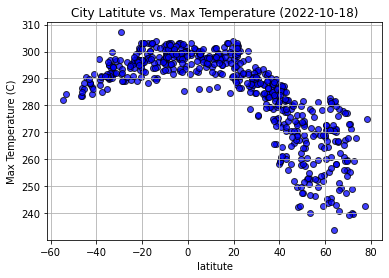

In [82]:
# Build scatter plot for latitude vs. temperature


# Incorporate the other graph properties
# YOUR CODE HERE
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75 )
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('latitute')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitute vs. Max Temperature (2022-10-18)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

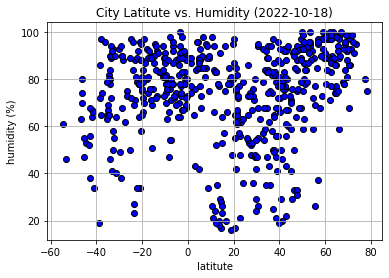

In [81]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black" )
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('latitute')
plt.ylabel('humidity (%)')
plt.title('City Latitute vs. Humidity (2022-10-18)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

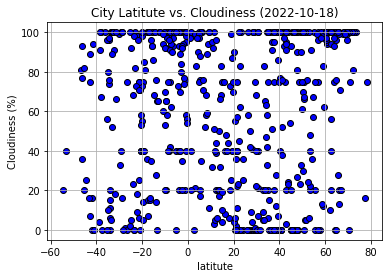

In [83]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black" )
plt.grid()
plt.xlabel('latitute')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitute vs. Cloudiness (2022-10-18)')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

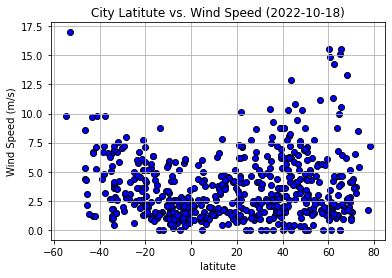

In [84]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black" )
plt.grid()
plt.xlabel('latitute')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitute vs. Wind Speed (2022-10-18)')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [124]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0 , : ].reset_index(drop=True)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,eruwa,7.5333,3.4167,297.67,81,52,0.89,NG,1669851214
1,dikson,73.5069,80.5464,267.85,95,100,5.42,RU,1669851214
2,channel-port aux basques,47.5702,-59.1367,273.55,75,90,7.32,CA,1669851215
3,san quintin,30.4833,-115.9500,288.13,68,7,4.80,MX,1669851216
4,provideniya,64.3833,-173.3000,271.21,74,0,3.00,RU,1669851218


In [125]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0 , : ].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bisho,-32.8472,27.4422,291.75,93,100,1.46,ZA,1669851213
1,rikitea,-23.1203,-134.9692,296.00,71,82,5.76,PF,1669851213
2,copiapo,-27.3667,-70.3333,288.98,62,1,2.64,CL,1669850967
3,mataura,-46.1927,168.8643,283.42,80,77,4.37,NZ,1669851216
4,sao jose da coroa grande,-8.8978,-35.1478,298.29,80,100,4.17,BR,1669851217


###  Temperature vs. Latitude Linear Regression Plot

In [153]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def regression_finder(x_values, y_values, y_label, x_axis_anno, y_axis_anno):
    (slope, intercept, rvalue, pvalue, stderr) = linregress( x_values, y_values )
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print(f'r value is {rvalue}')
   
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(x_axis_anno, y_axis_anno),xytext=(x_axis_anno, y_axis_anno),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    
    
    
    return
    

r value is -0.8133861684584676


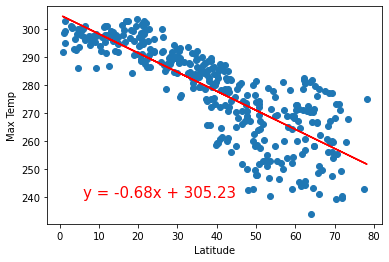

In [154]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
regression_finder( northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', 6, 240 )

r value is 0.6667666727984409


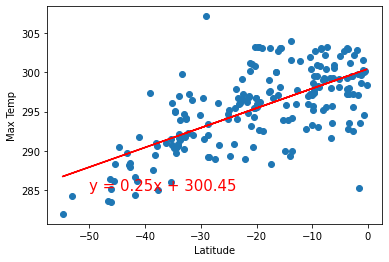

In [156]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
regression_finder( southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp', -50, 285)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r value is 0.3423747998585994


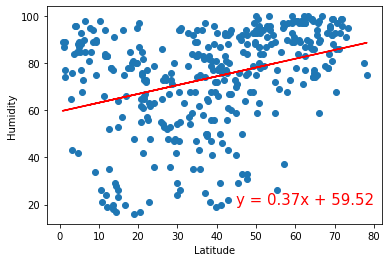

In [161]:
# Northern Hemisphere
# YOUR CODE HERE
regression_finder( northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', 45, 20)

r value is 0.3383830418863679


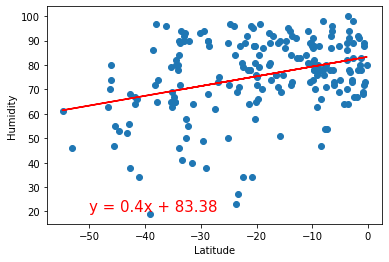

In [163]:
# Southern Hemisphere
# YOUR CODE HERE
regression_finder( southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', -50, 20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r value is 0.24524706011670108


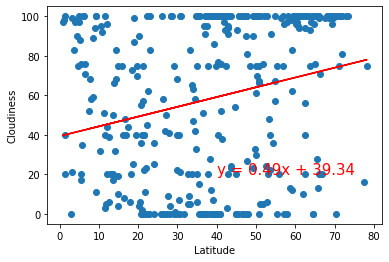

In [165]:
# Northern Hemisphere
# YOUR CODE HERE
regression_finder( northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', 40, 20)

r value is 0.2507029468565563


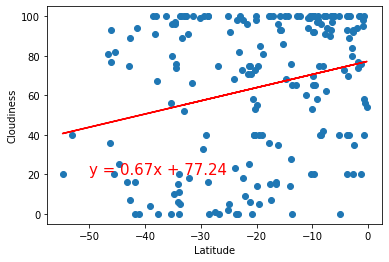

In [167]:
# Southern Hemisphere
# YOUR CODE HERE
regression_finder( southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', -50, 20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r value is 0.17386752325460655


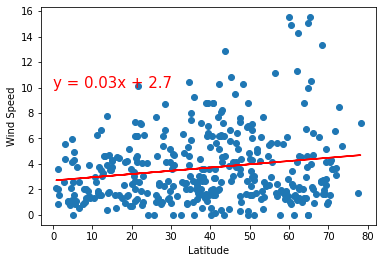

In [169]:
# Northern Hemisphere
# YOUR CODE HERE
regression_finder( northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', 0, 10)

r value is -0.487757403258075


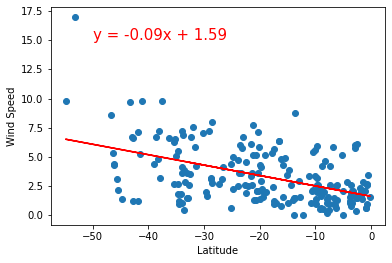

In [171]:
# Southern Hemisphere
# YOUR CODE HERE
regression_finder( southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', -50, 15)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Linear regression captures the correlation between two variables. rvalue measures the correlation quantitively. Possible values of the correlation coefficient range from -1 to +1, with -1 indicating a perfectly linear negative, i.e., inverse, correlation (sloping downward) and +1 indicating a perfectly linear positive correlation (sloping upward).

Based on the analysis:
1. latitute and max temperature have a strong negative corralation (rvalues : 0.8 (nouthern) and - 0.6(southern) perspectively) 
2. latitude and humidity have weak positive correlation. The latitute increases, the humidity increases as well.rvalues : 0.3 (northern) and 0.3(southern) perspectively) 
3. latitude and cloudiness have very weak positive correlation. The latitute increases, the cloudiness increases as well.rvalues : 0.2 (northern) and 0.2(southern) perspectively) 
4. About the wind speed, different trends can be observed. For northern hemisphere,latitude and wind speed have very weak positive correlation (rvaleu 0.2). However, for southern hemisphere, atitude and wind speed have weak negative correlation (rvaleu -0.48)


